_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Laboratorio: Regresión lineal y árboles de decisión para tareas de regresión


## Objetivos

Mediante esta actividad se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión.
    - Cómo utilizan las técnicas de regresión, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

#### Cargar el dataset

In [2]:
df = pd.read_csv('AirQualityUCI.csv', sep = ';', decimal = ',')

#### ¿Cuántas instancias tiene el dataset?

In [3]:
num_instancias = df.shape[0]  # Primera dimensión (filas)
print(f"Número de instancias: {num_instancias}")

Número de instancias: 9357


9327 instancias

#### ¿Cuál es el tipo de datos de cada una de las columnas?

In [4]:
column_types = df.dtypes

print("\nTipos de datos por columna:")
print(column_types)


Tipos de datos por columna:
Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)        int64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)        int64
T                float64
RH               float64
AH               float64
dtype: object


Se puede ver en el print

#### ¿Cuántas columnas categóricas hay? ¿y cuántas continuas?

In [5]:
# Identificar columnas categóricas (tipo 'object') y continuas (tipo 'float64' o 'int64')
categorical_columns = df.select_dtypes(include=['object']).columns
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Contar cuántas hay de cada tipo
num_categorical = len(categorical_columns)
num_continuous = len(continuous_columns)

print("Número de columnas categóricas:", num_categorical)
print("Número de columnas continuas:", num_continuous)

Número de columnas categóricas: 2
Número de columnas continuas: 13


Aunque en la pagina del archivo se dan diferentes tipos, tenemos 2 columnas categóricas (fecha y hora) y 15 contínuas, ya que representan cantidades o medidas

#### ¿Existen valores nulos en el dataset?

In [6]:
# Verificar valores nulos en cada columna
null_values = df.isnull().sum()

print("Valores nulos por columna:")
print(null_values)

Valores nulos por columna:
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


Aunque el csv al principio contenía columnas que en realidad no eran y filas que tampoco, tras limpiar el csv podemos ver que no contiene ninguna.

Leyendo la web de archive te dice que los mising values están marcados con un -200, por lo que sí hay y se mostrarán en el próximo print.

In [7]:
#buscar cuantos valores son -200 en todas las columnas
print("\nValores nulos reales por columna:")
for column in df.columns:
    print(f"{column}: {len(df[df[column] == -200])}")



Valores nulos reales por columna:
Date: 0
Time: 0
CO(GT): 1683
PT08.S1(CO): 366
NMHC(GT): 8443
C6H6(GT): 366
PT08.S2(NMHC): 366
NOx(GT): 1639
PT08.S3(NOx): 366
NO2(GT): 1642
PT08.S4(NO2): 366
PT08.S5(O3): 366
T: 366
RH: 366
AH: 366


Vamos a reemplazarlos por NaN

In [8]:
df.replace(-200, np.nan, inplace=True)

#### ¿Cuál es la variable respuesta?¿de qué tipo es?


Leyendo el artículo del archivo, hay un paper introductorio que se llama "On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario", con este nombre podemos dar a entender que la variable respuesta es el benceno (C6H6).

In [9]:
#ver el tipo de la variable respuesta

t_type = df['C6H6(GT)'].dtype
print("\nTipo de la variable respuesta:", t_type)


Tipo de la variable respuesta: float64


#### Si te fijas en los estadísticos del dataset, ¿cómo es la distribución de las variables, CO, NOx y NO2? 

Estadísticas descriptivas:
             CO(GT)      NOx(GT)      NO2(GT)
count  7674.000000  7718.000000  7715.000000
mean      2.152750   246.896735   113.091251
std       1.453252   212.979168    48.370108
min       0.100000     2.000000     2.000000
25%       1.100000    98.000000    78.000000
50%       1.800000   180.000000   109.000000
75%       2.900000   326.000000   142.000000
max      11.900000  1479.000000   340.000000


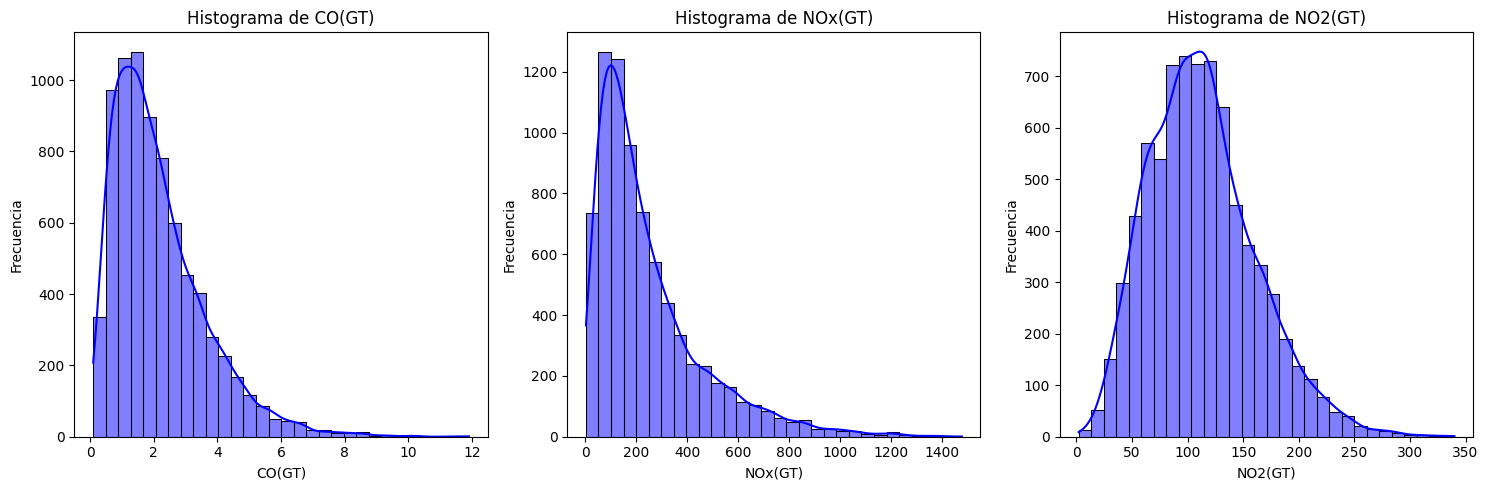

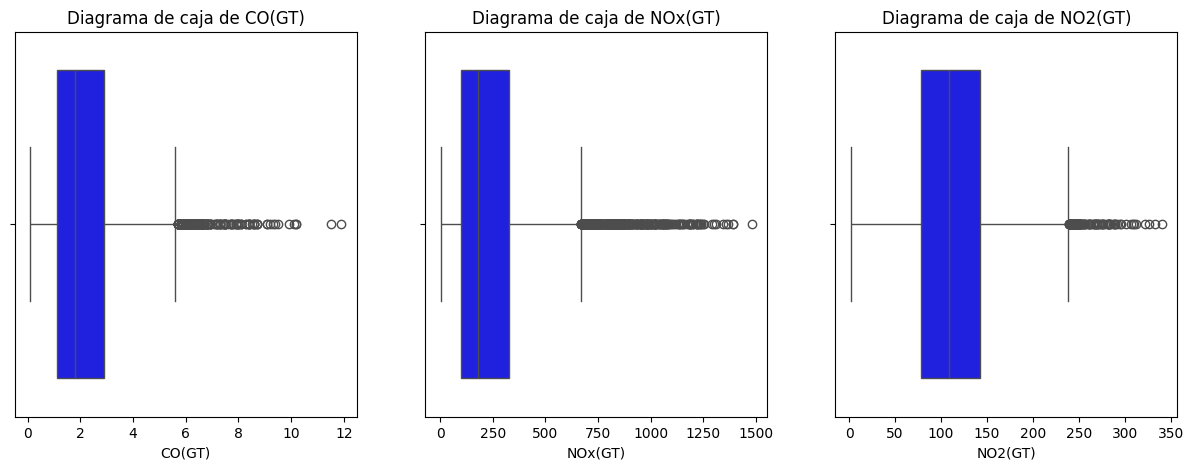

In [10]:
# Estadísticas descriptivas
variables_interes = ['CO(GT)', 'NOx(GT)', 'NO2(GT)']
stats = df[variables_interes].describe()
print("Estadísticas descriptivas:\n", stats)

# Crear histogramas
plt.figure(figsize=(15, 5))
for i, var in enumerate(variables_interes):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[var], kde=True, bins=30, color='blue')
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


# Crear diagramas de caja (boxplots) para cada uno solo
plt.figure(figsize=(15, 5))
for i, var in enumerate(variables_interes):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[var], color='blue')
    plt.title(f'Diagrama de caja de {var}')
    plt.xlabel(var)


Son todas asimétricas positivas con algún que otro valor atípico.

#### ¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?

Las tres muestran una distribución asimétrica positiva, tienen algún dato anómalo tal y como se pueden ver en los outliers.
Los datos faltantes no se representan, ya que están como NaN

#### ¿Cómo son las correlaciones entre las variables del dataset?

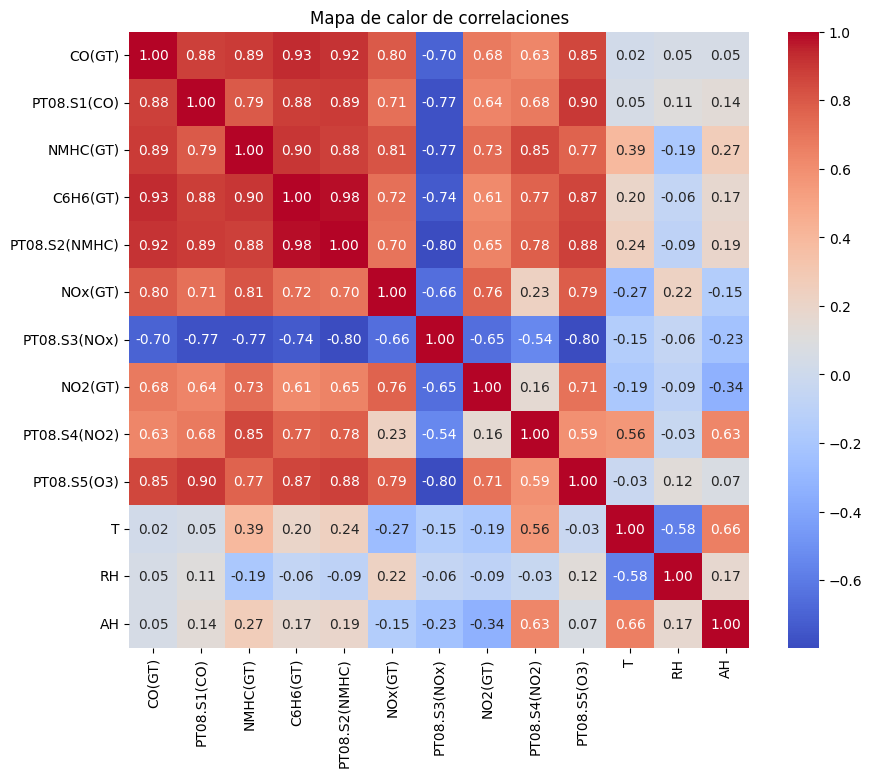

In [11]:
# Calcular matriz de correlación sin tener en cuenta date ni time
df_corr = df.drop(columns=['Date', 'Time'])
correlation_matrix = df_corr.corr()

# Crear mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlaciones')
plt.show()


Como vemos, hay una fuerte correlación entre la mayoría de las columnas.

Entre las correlaciones destacamos la ausencia de correlación de temperatura, humedad relativa y humedad absoluta con las demás variables. Además de destacar una fuerte correlación negativa entre PT08.S3(NOx) con casi todas las columnas.

#### ¿Qué tres variables son las más correlacionadas con la variable objetivo?

Si la variable respuesta es el benceno (C6H6), podemos decir que las tres variables más correlacionadas con esta son:
- PT08.S2(NMHC) con un 98%.
- CO(GT) con un 93%.
- MNHC(GT) con un 90%.

#### ¿Existe alguna variable que no tenga correlación?

Como podemos ver en la matriz de correlación, hay variables como T, AH o RH que no tienen apenas correlación con ninguna de las variables. 

Hay Muchas que tienen una correlación alta como podemos ver en el cuadrado izquierdo superior.

En cambio PT08.S3(NOx) tiene una correlación negativa con casi todas las demás columnas.

#### En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

Debemos sustituir los valores NaN por una imputación que tenga sentido dependiendo de la distribución.

Según los coeficientes de pearson debemos eliminar algunas columnas por tener redundancia, ya que esto puede causar problemas en los modelos.

##### Valores nulos

Primero vamos a recordar la cantidad de datos nulos por columna

In [12]:
# Verificar valores nulos en cada columna y ver cual es el porcentaje
null_values = df_corr.isnull().sum()
null_percent = (null_values / num_instancias) * 100

print("Valores nulos por columna:")
print(null_values)
print("\nPorcentaje de valores nulos por columna:")
print(null_percent)

Valores nulos por columna:
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Porcentaje de valores nulos por columna:
CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64


Podemos ver que hay:
- Una columna con 90% de valores nulos: Se elimina.
- Las demás columnas con menos de un 18%, las que vamos a estudiar para ver que valores usamos.

Como vemos, NMHC(GT) tiene en su mayoría de valores, valores nulos, por lo que debemos considerar eliminar la columna al no tener casi información y contener 90% de datos nulos. Para las demás columnas podemos realizar imputaciones de datos

In [13]:
eliminar = ['NMHC(GT)']
df_corr.drop(columns=eliminar, inplace=True)

Ahora vamos a ver si hay filas con todos los valores nulos. Ya que me parece extrañoq ue todas las columnas tengan un 3.911% de valores nulos.

In [14]:
# Contar filas completamente nulas
num_filas_todas_nulas = df.isnull().all(axis=1).sum()
print(f"Número de filas con todos los valores nulos: {num_filas_todas_nulas}")

Número de filas con todos los valores nulos: 0


##### Imputación

Para sustituir los valores nulos, vamos a ver la distribución de los datos para tener una idea significativa de que estrategia utilizar.

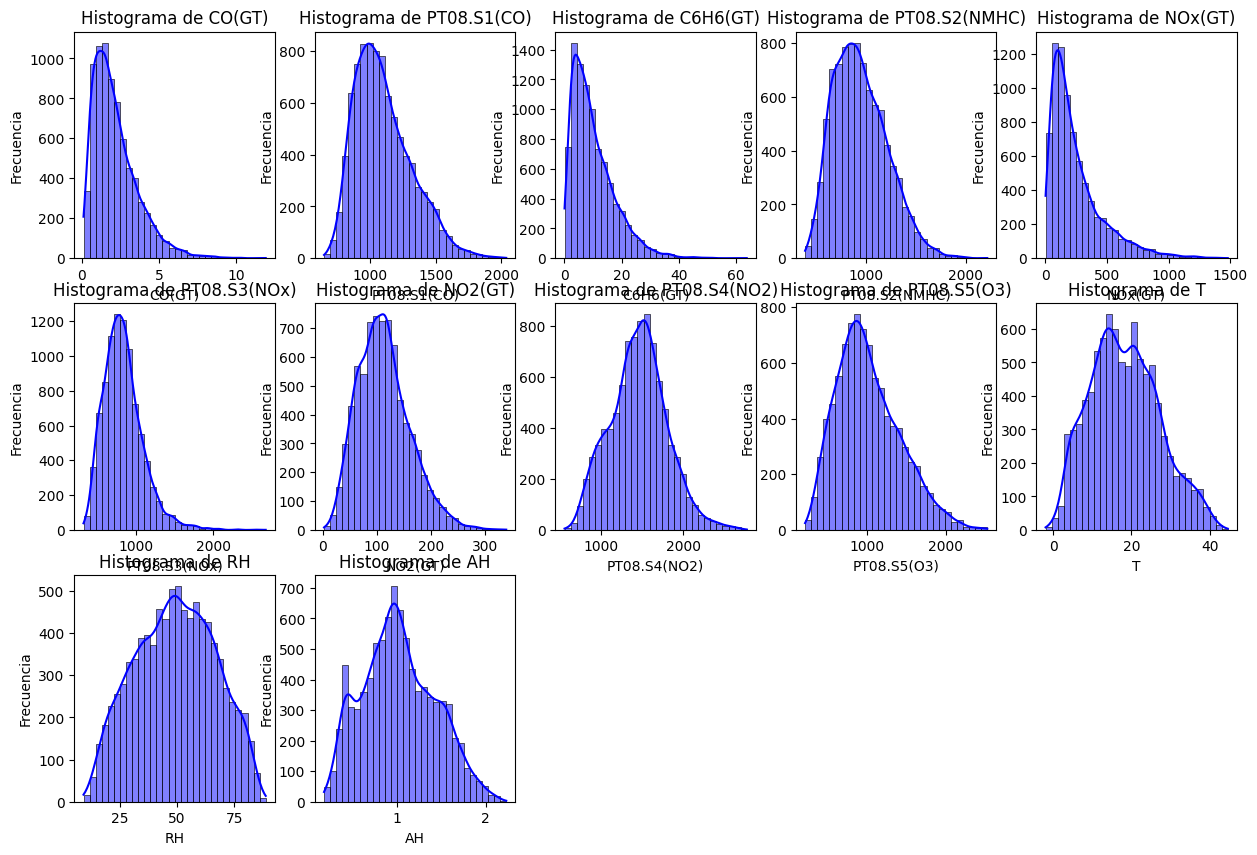

In [15]:
# Crear diagramas de distribuciones para cada una de las columnas del dataset
plt.figure(figsize=(15, 10))
for i, var in enumerate(df_corr.columns):
    plt.subplot(3, 5, i + 1)
    sns.histplot(df[var], kde=True, bins=30, color='blue')
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

Viendo las diferentes distribuciones y el porcentaje de valores nulos vamos a seguir la siguiente estrategia:
- Distribución asimétrica positiva: Mediana. [CO(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx)]
- Distribución simétrica: media. [PT08.S1(CO), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH]

In [16]:
# Imputar los valores nulos con la media 

cols_media = ['PT08.S1(CO)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

# Imputar con la media
for col in cols_media:
    df_corr[col] = df_corr[col].fillna(df_corr[col].mean())


In [17]:
#imputar valores nulos con la mediana
cols_mediana = ['CO(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)']

# Imputar con la mediana
for col in cols_mediana:
    df_corr[col] = df_corr[col].fillna(df_corr[col].median())

In [18]:
# Verificar valores nulos en cada columna y ver cual es el porcentaje
null_values = df_corr.isnull().sum()
null_percent = (null_values / num_instancias) * 100

print("Valores nulos por columna:")
print(null_values)

Valores nulos por columna:
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


Ahora vemos las correlaciones y las distribuciones para ver si han cambiado mucho con los nuevos datos

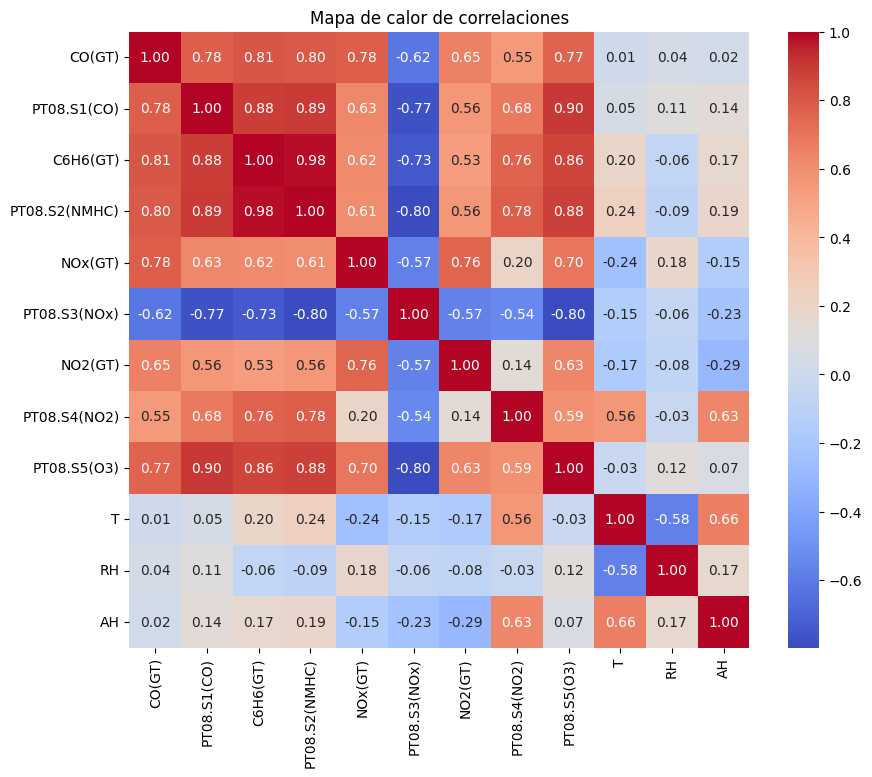

In [19]:
correlation_matrix = df_corr.corr()

# Crear mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlaciones')
plt.show()

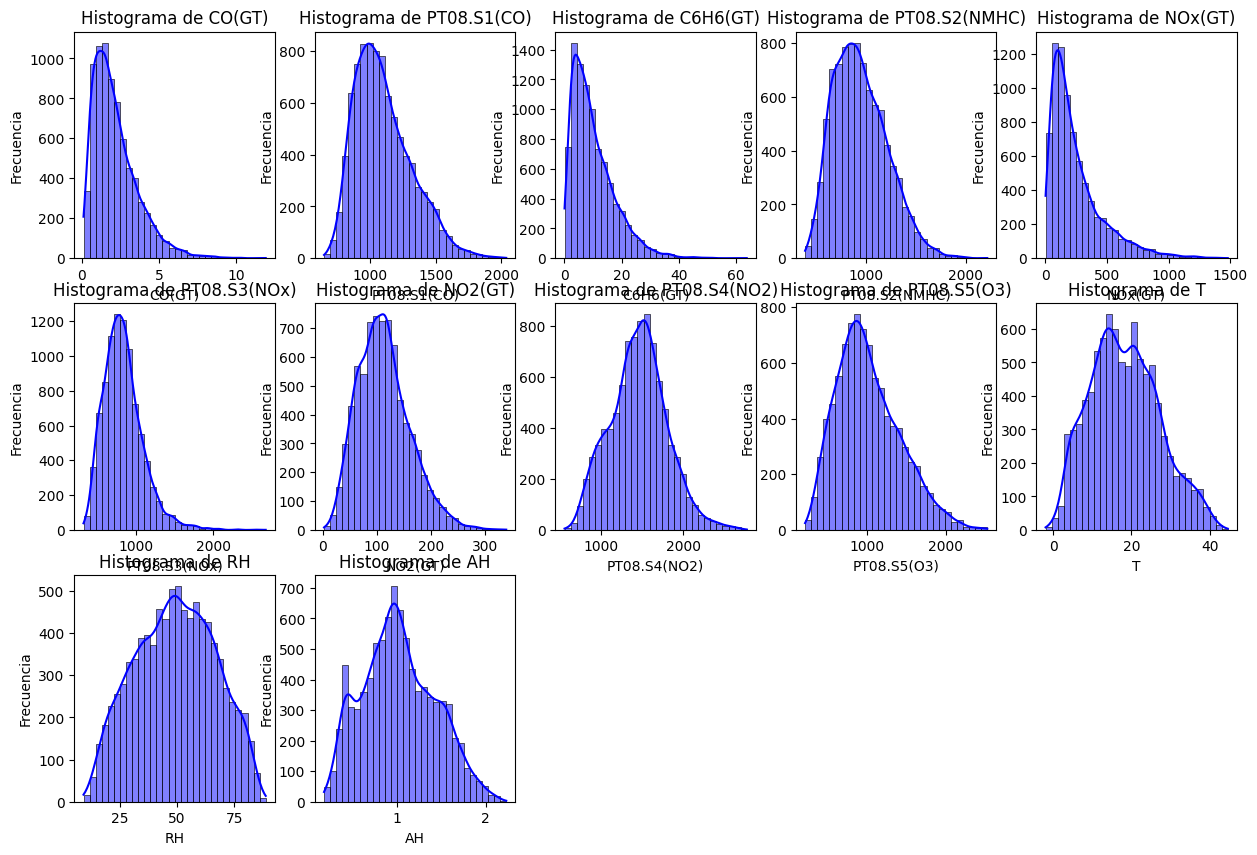

In [20]:
# Crear diagramas de distribuciones para cada una de las columnas del dataset
plt.figure(figsize=(15, 10))
for i, var in enumerate(df_corr.columns):
    plt.subplot(3, 5, i + 1)
    sns.histplot(df[var], kde=True, bins=30, color='blue')
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

Como podemos ver, hemos hecho una buena estrategia, ya que ni las distribuciones ni las correlaciones han cambiado demasiado.

##### Redundancia entre columnas

Debido a la alta redundancia entre varias columnas he decidido borrar PT08.S1(CO), PT08.S2(NMHC) y PT08.S2(NMHC)

In [21]:
#Eliminar columnas redundantes PT08.S1(CO), PT08.S2(NMHC) y PT08.S2(NMHC)
eliminar = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)']

#no hacer los cambios en el dataset original
df_clean = df_corr.drop(columns=eliminar)

# Guardar el dataset limpio
df_clean.to_csv('AirQualityUCI_clean.csv', index=False, sep = ';')


### Regresión

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

El algortimo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una regresión lineal simple. Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

In [22]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame


scaler = StandardScaler()

X_train = DataFrame(scaler.fit_transform(X_train))
X_test = DataFrame(scaler.fit_transform(X_test))

NameError: name 'StandardScaler' is not defined

In [ ]:
# separar datos de entrenamiento y test

In [ ]:
# escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción

In [ ]:
# entrena el modelo con los datos de entrenamiento

In [ ]:
# ¿cuáles son los valores aprendidos por el modelo para los parámetros?

Explica qué indican estos parámetros

_indica aquí tu respuesta_

In [ ]:
# realiza las predicciones para el conjunto de datos de test

In [ ]:
# Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?

_indica aquí tu respuesta_

In [ ]:
# ¿Qué error tiene el modelo? Explícalo.

_indica aquí tu respuesta_

Ahora debes entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?

_indica aquí tu respuesta_

#### Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algortimo de DTRegressor necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* criterion
* splitter
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

Indica qué son cada uno de estos hiperparámetros

_indica aquí tu respuesta_

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_

Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea _poisson_, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

Calcula MAE, R2 y RMSLE

¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.

¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

_indica aquí tu respuesta_

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de regresión?

## Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión. Técnicas de regresión empleadas y si realiza alguna adaptación. Principales resultados de la aplicación y de la investigación.